<a href="https://colab.research.google.com/github/nekodango/tokyo_stopcovid19_opendata/blob/plotly/tokyo_opendata_covid19_patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 1.   データの取得・集計



In [1]:
import pandas as pd

In [2]:
!wget https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv

--2020-07-04 13:47:00--  https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv
Resolving stopcovid19.metro.tokyo.lg.jp (stopcovid19.metro.tokyo.lg.jp)... 104.248.63.231, 2604:a880:400:d0::caa:3001
Connecting to stopcovid19.metro.tokyo.lg.jp (stopcovid19.metro.tokyo.lg.jp)|104.248.63.231|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 443062 (433K) [text/csv]
Saving to: ‘130001_tokyo_covid19_patients.csv’

130001_tokyo_covid1 100%[===================>] 432.68K  2.77MB/s    in 0.2s    

2020-07-04 13:47:00 (2.77 MB/s) - ‘130001_tokyo_covid19_patients.csv’ saved [443062/443062]



In [3]:
# 東京都_新型コロナウイルス陽性患者発表詳細
df_patients = pd.read_csv('130001_tokyo_covid19_patients.csv')
df_patients['公表_年月日'] = pd.to_datetime(df_patients['公表_年月日'], format='%Y-%m-%d')
# 1行目に破損データ?が含まれているため、それを除去する
#df_patients.dropna(subset=['公表_年月日'], inplace=True)

In [4]:
# 読み込んだテーブル先頭5行を表示する
df_patients.head(5)

,No,全国地方公共団体コード,都道府県名,市区町村名,公表_年月日,曜日,発症_年月日,患者_居住地,患者_年代,患者_性別,患者_属性,患者_状態,患者_症状,患者_渡航歴の有無フラグ,備考,退院済フラグ
0,1,130001,東京都,NaN,2020-01-24,金,NaN,湖北省武漢市,40代,男性,NaN,NaN,NaN,NaN,NaN,1.0
1,2,130001,東京都,NaN,2020-01-25,土,NaN,湖北省武漢市,30代,女性,NaN,NaN,NaN,NaN,NaN,1.0
2,3,130001,東京都,NaN,2020-01-30,木,NaN,湖南省長沙市,30代,女性,NaN,NaN,NaN,NaN,NaN,1.0
3,4,130001,東京都,NaN,2020-02-13,木,NaN,都内,70代,男性,NaN,NaN,NaN,NaN,NaN,1.0
4,5,130001,東京都,NaN,2020-02-14,金,NaN,都内,50代,女性,NaN,NaN,NaN,NaN,NaN,1.0


In [24]:
df_patients.tail(10)

,No,全国地方公共団体コード,都道府県名,市区町村名,公表_年月日,曜日,発症_年月日,患者_居住地,患者_年代,患者_性別,患者_属性,患者_状態,患者_症状,患者_渡航歴の有無フラグ,備考,退院済フラグ
6644,6425,130001,東京都,NaN,2020-07-04,土,NaN,NaN,50代,男性,NaN,NaN,NaN,NaN,NaN,NaN
6645,6445,130001,東京都,NaN,2020-07-04,土,NaN,NaN,50代,男性,NaN,NaN,NaN,NaN,NaN,NaN
6646,6460,130001,東京都,NaN,2020-07-04,土,NaN,NaN,50代,男性,NaN,NaN,NaN,NaN,NaN,NaN
6647,6442,130001,東京都,NaN,2020-07-04,土,NaN,NaN,60代,女性,NaN,NaN,NaN,NaN,NaN,NaN
6648,6486,130001,東京都,NaN,2020-07-04,土,NaN,NaN,60代,男性,NaN,NaN,NaN,NaN,NaN,NaN
6649,6464,130001,東京都,NaN,2020-07-04,土,NaN,NaN,70代,男性,NaN,NaN,NaN,NaN,NaN,NaN
6650,6541,130001,東京都,NaN,2020-07-04,土,NaN,NaN,70代,男性,NaN,NaN,NaN,NaN,NaN,NaN
6651,6438,130001,東京都,NaN,2020-07-04,土,NaN,NaN,80代,女性,NaN,NaN,NaN,NaN,NaN,NaN
6652,6427,130001,東京都,NaN,2020-07-04,土,NaN,NaN,80代,男性,NaN,NaN,NaN,NaN,NaN,NaN
6653,6439,130001,東京都,NaN,2020-07-04,土,NaN,NaN,90代,女性,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 縦軸に日付、横軸に年代をとった、日別・年代別陽性患者数の集計表を作る
df_tmp = df_patients[['公表_年月日', '患者_年代']]
df_tmp['人数'] = 1
df_tmp2 = df_tmp.pivot(columns='患者_年代', values='人数' )
df_tmp = pd.concat([df_tmp['公表_年月日'], df_tmp2], axis=1).fillna(0)
df_tmp = df_tmp[['公表_年月日', '10歳未満', '10代',  '20代', '30代', '40代', '50代', '60代', '70代', '80代', '90代']]
df_tmp = df_tmp.groupby('公表_年月日').sum()
df_dairy_patients = df_tmp.resample('D').mean().fillna(0) #.to_csv('patients.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
# 日別・年代別陽性患者数の集計表を表示する
df_dairy_patients

,10歳未満,10代,20代,30代,40代,50代,60代,70代,80代,90代
公表_年月日,,,,,,,,,,
2020-01-24,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-06-30,2.0,5.0,16.0,10.0,8.0,7.0,2.0,3.0,1.0,0.0
2020-07-01,2.0,2.0,35.0,14.0,9.0,3.0,2.0,0.0,0.0,0.0
2020-07-02,3.0,2.0,37.0,34.0,11.0,10.0,2.0,3.0,2.0,3.0


# 2. 可視化

In [7]:
# Seabornで日本語フォントを使えるようにする
!pip install japanize_matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib 
import seaborn as sns

sns.set(font="IPAexGothic")

     |████████████████████████████████| 4.1MB 2.8MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.2-cp36-none-any.whl size=4120191 sha256=f00de87517618241a56eae2d3650469674d76284a10381b1e7644c0e8dc5b594
  Stored in directory: /root/.cache/pip/wheels/9c/f9/fc/bc052ce743a03f94ccc7fda73d1d389ce98216c6ffaaf65afc
Successfully built japanize-matplotlib


/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
# 曜日が日本語(日〜金)の日時ラベルを作る
week = {'Sun': '日', 'Mon': '月', 'Tue': '火', 'Wed': '水', 'Thu': '木', 'Fri': '金', 'Sat': '土'}
date_monthday = list(df_dairy_patients.index.strftime('%m/%d'))
date_week = [week[x] for x in list(df_dairy_patients.index.strftime('%a'))]
date_label = [f'{monthday}({week})' for monthday, week in zip(date_monthday, date_week)]

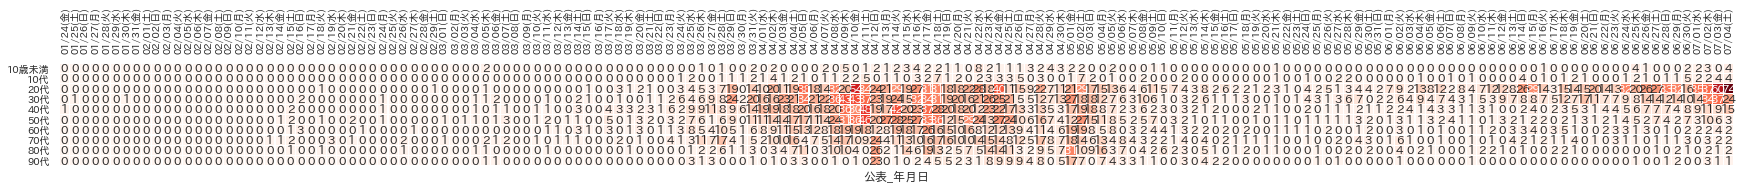

In [9]:
# 縦軸に年代、横軸に日付をとった陽性患者数のヒートマップ
plt.figure(figsize=(30, 16))
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
sns.heatmap(df_dairy_patients.T, square=True, annot=True, cbar=False, cmap='Reds', linewidths=0.1, xticklabels=date_label)

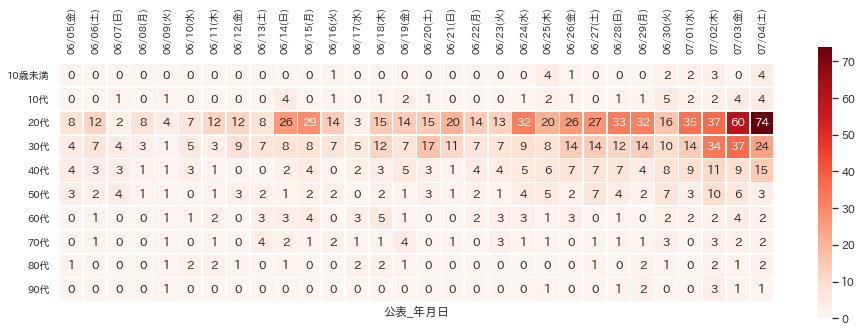

In [10]:
# 縦軸に年代、横軸に日付をとった陽性患者数のヒートマップ(日数指定)
d = 30
plt.figure(figsize=(16, 5))
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
sns.heatmap(df_dairy_patients[(-d):].T, square=True, annot=True, cbar=True, cmap='Reds', linewidths=.5, xticklabels=date_label[-d:])

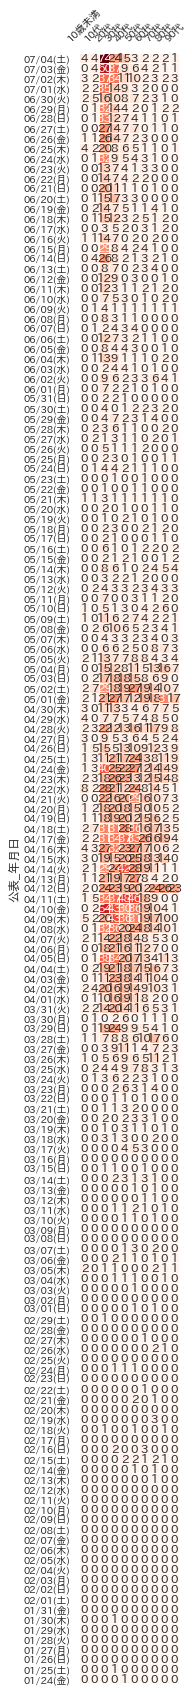

In [11]:
# 縦軸に日付、横軸に年代をとった陽性患者数のヒートマップ
plt.figure(figsize=(20, 30))
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
chart = sns.heatmap(df_dairy_patients.sort_index(ascending=False), square=True, annot=True, cbar=False, cmap='Reds', linewidths=0.1, yticklabels=list(reversed(date_label)))
# 横軸ラベルを斜め45度傾ける。
_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [12]:
df_dairy_patients

,10歳未満,10代,20代,30代,40代,50代,60代,70代,80代,90代
公表_年月日,,,,,,,,,,
2020-01-24,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-06-30,2.0,5.0,16.0,10.0,8.0,7.0,2.0,3.0,1.0,0.0
2020-07-01,2.0,2.0,35.0,14.0,9.0,3.0,2.0,0.0,0.0,0.0
2020-07-02,3.0,2.0,37.0,34.0,11.0,10.0,2.0,3.0,2.0,3.0


In [14]:
df_dairy_patients.reset_index()

,公表_年月日,10歳未満,10代,20代,30代,40代,50代,60代,70代,80代,90代
0,2020-01-24,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
158,2020-06-30,2.0,5.0,16.0,10.0,8.0,7.0,2.0,3.0,1.0,0.0
159,2020-07-01,2.0,2.0,35.0,14.0,9.0,3.0,2.0,0.0,0.0,0.0
160,2020-07-02,3.0,2.0,37.0,34.0,11.0,10.0,2.0,3.0,2.0,3.0
161,2020-07-03,0.0,4.0,60.0,37.0,9.0,6.0,4.0,2.0,1.0,1.0


In [16]:
df_dairy_patients_long = pd.melt(df_dairy_patients.reset_index(),id_vars='公表_年月日', var_name='年代', value_name='人数')

In [17]:
df_dairy_patients_long

,公表_年月日,年代,人数
0,2020-01-24,10歳未満,0.0
1,2020-01-25,10歳未満,0.0
2,2020-01-26,10歳未満,0.0
3,2020-01-27,10歳未満,0.0
4,2020-01-28,10歳未満,0.0
...,...,...,...
1625,2020-06-30,90代,0.0
1626,2020-07-01,90代,0.0
1627,2020-07-02,90代,3.0
1628,2020-07-03,90代,1.0


In [20]:
import plotly.express as px
import plotly.graph_objects as go

In [23]:
fig = px.line(df_dairy_patients_long, x='公表_年月日', y='人数', color='年代', range_y=[0, df_dairy_patients_long['人数'].max()])
fig.update_xaxes(rangeslider_visible=True)
fig.show()